# Exploration - Machine Temperature Dataset 

In this notebook, we conduct an exploratory analysis of the machine temperature dataset from the NAB (Numenta Anomaly Benchmark). The objective is to gain initial insights into the dataset structure and visualize patterns.

Goals:
- Load the NAB machine temperature series + labeled anomaly windows
- Quick EDA: ranges, missing values, sampling interval
- Visualize full series with shaded anomaly windows

## 1: Setup

Import core libraries and helper functions from our "utils" module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pathlib

repo_root = pathlib.Path.cwd().resolve().parents[1]  
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

# utils from this repo
from utils.data_loader import load_dataset  # if you added DATASETS registry
# fallback if you didn’t add the registry yet:
# from utils.data_loader import load_data_and_labels

from utils.visualizations import (
    plot_full_series_with_windows,
    plot_series_with_windows_and_points,
    plot_error_and_threshold,
)


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for Autocorrelation



## 2: Load the Machine Temperature Dataset



In [2]:
df, anomaly_windows = load_dataset("machine_temperature")
df.head()


,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


## 3: Dataset Overview

Check the shape, time range, column names, and missing values.  


In [3]:
print("Shape:", df.shape)
print("Time range:", df.index.min(), "→", df.index.max())
print("Columns:", list(df.columns))

print("\n.describe():")
display(df.describe())


print("\nMissing values by column:\n", df.isna().sum())


Shape: (22695, 1)
Time range: 2013-12-02 21:15:00 → 2014-02-19 15:25:00
Columns: ['value']

.describe():


,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543



Missing values by column:
 value    0
dtype: int64


## 4: Plot Full Series with Labeled Anomalies

Plot the machine temperature and overlay NAB anomaly windows as shaded regions.


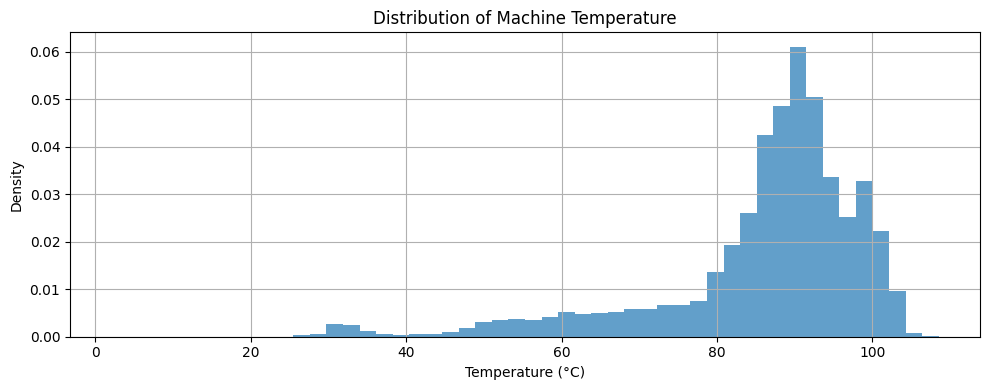

In [4]:
plt.figure(figsize=(10,4))
plt.hist(df["value"].dropna(), bins=50, alpha=0.7, density=True)
plt.title("Distribution of Machine Temperature")
plt.xlabel("Temperature (°C)"); plt.ylabel("Density")
plt.grid(True); plt.tight_layout(); plt.show()


## 5: Distribution of Values

We plot a histogram to see the distribution of machine temperature values.


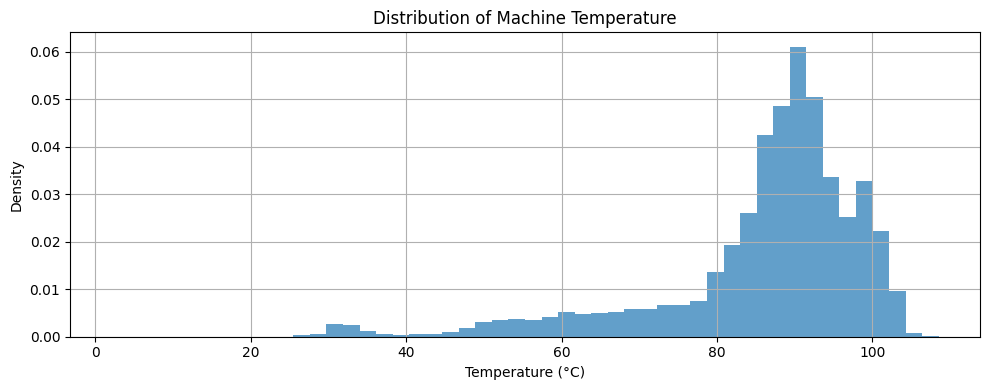

In [5]:
plt.figure(figsize=(10,4))
plt.hist(df["value"].dropna(), bins=50, alpha=0.7, density=True)
plt.title("Distribution of Machine Temperature")
plt.xlabel("Temperature (°C)"); plt.ylabel("Density")
plt.grid(True); plt.tight_layout(); plt.show()

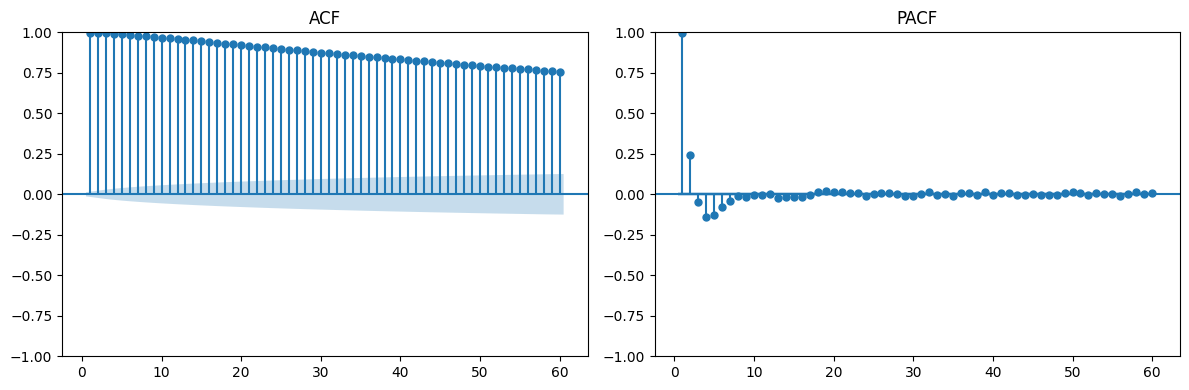

In [6]:
sample = df["value"].dropna()
max_lags = 60

fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(sample, ax=axes[0], lags=max_lags, zero=False)
axes[0].set_title("ACF")
plot_pacf(sample, ax=axes[1], lags=max_lags, zero=False, method="ywm")
axes[1].set_title("PACF")
plt.tight_layout(); plt.show()


In [7]:
# load data
url = "https://raw.githubusercontent.com/hjalalin/nab-anomaly-detection/main/data/realKnownCause/machine_temperature_system_failure.csv"
df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Load labeled anomaly windows from NAB
url = "https://raw.githubusercontent.com/numenta/NAB/master/labels/combined_windows.json"
response = requests.get(url)
labels = response.json()

# Extract windows for our dataset
label_key = "realKnownCause/machine_temperature_system_failure.csv"
anomaly_windows = [
    (pd.to_datetime(start), pd.to_datetime(end))
    for start, end in labels[label_key]
]

NameError: name 'requests' is not defined

Normal readings (blue) dominate the histogram, with most values clustered between 80°C and 100°C. The overall distribution of temperature readings in normal conditon is left-skewed, with a noticeable tail toward lower temperatures. Some of these low-temperature readings during normal operation may indicate equipment shutdowns, startup phases, or sensor artifacts, and do not necessarily indicate system faults.
Failure-period readings (salmon) are concentrated more heavily in the lower temperature range, reflecting sudden drops commonly associated with known system failures.
However, there is significant overlap between normal and failure-period temperature values, indicating that temperature alone is not a sufficient indicator of failure. While many failures coincide with low-temperature readings, similar drops can also occur under normal conditions. 